# 1. Install depedencies

In [1]:
!python --version

Python 3.9.23


In [8]:
!python -c "import torch; import torchvision; import sys;print('\nIgnore output above, BELOW ARE VERSION LISTED:\n');print('Python version:',sys.version);print('Pytorch version:', torch.__version__); print('Torchvision version:', torchvision.__version__)"

/opt/anaconda3/envs/uzslr-signs/lib/python3.9/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/opt/anaconda3/envs/uzslr-signs/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <FB2FD416-6C4D-3621-B677-61F07C02A3C5> /opt/anaconda3/envs/uzslr-signs/lib/python3.9/site-packages/torchvision/image.so
  Reason: tried: '/opt/anaconda3/envs/uzslr-signs/lib/python3.9/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/opt/anaconda3/envs/uzslr-signs/lib/python3.9/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/opt/anaconda3/envs/uzslr-signs/lib/python3.9/lib-dynload/../../libjpeg.9.dylib' (no such file), '/opt/anaconda3/envs/uzslr-signs/bin/../lib/libjpeg.9.dylib' (no such file)'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environ

In [30]:
!conda export --from-history

name: uzslr-signs
channels:
  - conda-forge
  - defaults
  - https://repo.anaconda.com/pkgs/main
  - https://repo.anaconda.com/pkgs/r
dependencies:
  - python=3.9.23
  - ipykernel
  - pytorch=2.5.1
  - torchvision=0.20.1
  - jupyter
  - pandas
  - matplotlib
  - numpy
  - scikit-learn
  - tqdm
  - opencv
  - pathlib
prefix: /opt/anaconda3/envs/uzslr-signs


In [3]:
!which pip

/opt/anaconda3/envs/uzslr-signs/bin/pip


In [4]:
!which pip3

/opt/anaconda3/envs/uzslr-signs/bin/pip3


In [9]:
#!conda install pytorch=2.5.1 torchvision=0.20.1 torchaudio -c pytorch

In [10]:
#!pip3/conda uninstall torch torchvision torchaudio -y # delete pytorch

In [17]:
!conda install -q --yes numpy pandas matplotlib scikit-learn tqdm pathlib

Channels:
 - conda-forge
 - defaults
 - pytorch
Platform: osx-arm64
Solving environment: ...working... done

## Package Plan ##

  environment location: /opt/anaconda3/envs/uzslr-signs

  added / updated specs:
    - matplotlib
    - numpy
    - pandas
    - scikit-learn
    - tqdm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    colorama-0.4.6             |     pyhd8ed1ab_1          26 KB  conda-forge
    fsspec-2025.7.0            |     pyhd8ed1ab_0         142 KB  conda-forge
    libabseil-20250127.1       | cxx17_h07bc746_0         1.1 MB  conda-forge
    libprotobuf-5.29.3         |       h7463a21_3         2.5 MB  conda-forge
    libtorch-2.5.1             |cpu_generic_h0f11145_17        27.0 MB  conda-forge
    libuv-1.51.0               |       h6caf38d_1         411 KB  conda-forge
    nomkl-1.0                  |       h5ca1d4c_0           4 KB  conda-forge
    pybind11-3.0.1 

In [18]:
!conda install -q --yes -c conda-forge opencv

Channels:
 - conda-forge
 - defaults
 - pytorch
Platform: osx-arm64
Solving environment: ...working... done

## Package Plan ##

  environment location: /opt/anaconda3/envs/uzslr-signs

  added / updated specs:
    - opencv


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    aom-3.9.1                  |       h7bae524_0         2.1 MB  conda-forge
    c-ares-1.34.6              |       hc919400_0         176 KB  conda-forge
    cyrus-sasl-2.1.28          |       ha1cbb27_0         189 KB  conda-forge
    dav1d-1.2.1                |       hb547adb_0         309 KB  conda-forge
    dbus-1.16.2                |       h3ff7a7c_1         385 KB  conda-forge
    double-conversion-3.3.1    |       h286801f_0          62 KB  conda-forge
    ffmpeg-7.1.1               | gpl_h20db955_106         8.7 MB  conda-forge
    hdf5-1.14.6                |nompi_hd3baa01_104         3.1 MB  conda-forge
    i

# 2. Config

In [6]:
# checking if mps is enabled. MPS is Apple Sillion GPU
!python -c "import torch; print(f'MPS available: {torch.backends.mps.is_available()}'); print(f'MPS built with PyTorch: {torch.backends.mps.is_built()}')"


MPS available: True
MPS built with PyTorch: True


In [39]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt
import matplotlib as mpl

from tqdm.autonotebook import tqdm
import sklearn

import os
import time
import pickle
import math
import random
import sys
import cv2
import gc
import glob
import datetime
from pathlib import Path
import PIL
from IPython.display import Image

print(f'PyTorch Version: {torch.__version__}')
print(f'Python Version: {sys.version}')

PyTorch Version: 2.5.1
Python Version: 3.9.23 | packaged by conda-forge | (main, Jun  4 2025, 18:02:02) 
[Clang 18.1.8 ]


# 3. Work

In [2]:
def seed_everything(seed=42):
    os.environ["PYTHONHASHSEED"] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

def get_device():
    if torch.backends.mps.is_available():
        device = torch.device("mps")
        device_name = "Apple MPS"
    elif torch.cuda.is_available():
        device = torch.device("cuda")
        device_name = "CUDA GPU"
    else:
        device = torch.device("cpu")
        device_name = "CPU"

    print(f"Using device: {device_name}")
    return device

In [3]:
seed_everything(42)
device = get_device()
N_REPLICAS = 1

Using device: Apple MPS


## 3.1 loading dataset

In [4]:
DATA_ROOT = Path("../../data")
SPLITS = ["train", "validation", "test"]

# 50 signs
DEFAULT_SIGNS = ['assalomu_alaykum', 'bahor', 'birga', "bo'sh", 'bosh_kiyim', 'boshlanishi', 'bozor', 'eshik', 
               'futbol', 'iltimos', 'internet', 'javob', 'jismoniy_tarbiya', 'karam', 'kartoshka', 
               'kichik', 'kitob', "ko'prik", 'likopcha', 'maktab', 'mehmonxona', 'mehribon', 'metro', 
               'musiqa', "o'simlik_yog'i", "o'ynash", 'ochish', 'ot', 'ovqat_tayyorlash', 
               'oxiri', 'poezd', 'pomidor', 'qidirish', 'qish', "qo'ziqorin", 'qor', "qorong'i", 'quyon', 
               'restoran', "sariyog'", 'shokolad', 'sovun', 'stakan', 'televizor', 'tosh', 'toza',
               'turish', "yomg'ir", 'yopish', 'yordam_berish'] 

In [5]:
label2id = {sign: idx for idx, sign in enumerate(DEFAULT_SIGNS)}
id2label = {idx: sign for sign, idx in label2id.items()}

NUM_CLASSES = len(DEFAULT_SIGNS)
print("Number of classes:", NUM_CLASSES)

Number of classes: 50


In [6]:
def build_index(split):
    split_path = DATA_ROOT / split
    samples = []

    for sign in DEFAULT_SIGNS:
        sign_path = split_path / sign
        if not sign_path.exists():
            continue

        label = label2id[sign]

        for rep_dir in sign_path.iterdir():
            if not rep_dir.is_dir():
                continue

            frames = sorted(rep_dir.glob("frame-*.npy"))
            if len(frames) != 32:
                continue  # safety

            samples.append({
                "frames": frames,
                "label": label,
                "sign": sign,
                "rep_path": rep_dir
            })

    return samples

In [7]:
train_samples = build_index("train")
val_samples   = build_index("validation")
test_samples  = build_index("test")

print("Train samples:", len(train_samples))
print("Val samples:", len(val_samples))
print("Test samples:", len(test_samples))

Train samples: 2038
Val samples: 250
Test samples: 300


## 3.2 preprocess

In [8]:
FACE_LANDMARKS = 468
POSE_LANDMARKS = 33
HAND_LANDMARKS = 21

In [9]:
FACE_START = 0
FACE_END   = 468 * 3

POSE_START = FACE_END
POSE_END   = POSE_START + 33 * 4

RH_START   = POSE_END
RH_END     = RH_START + 21 * 3

LH_START   = RH_END
LH_END     = LH_START + 21 * 3

In [49]:
MAX_LEN = 32              # fixed
PAD_VALUE = 0.0           # shorter frames are not padded
NUM_CLASSES = 50          # 50 uzbek signs

In [54]:
NOSE=[
    1,2,98,327
]
# additional info
LNOSE = [98]
RNOSE = [327]

LIP = [ 0, 
    61, 185, 40, 39, 37, 267, 269, 270, 409,
    291, 146, 91, 181, 84, 17, 314, 405, 321, 375,
    78, 191, 80, 81, 82, 13, 312, 311, 310, 415,
    95, 88, 178, 87, 14, 317, 402, 318, 324, 308,
]

# additional info
LLIP = [84,181,91,146,61,185,40,39,37,87,178,88,95,78,191,80,81,82]
RLIP = [314,405,321,375,291,409,270,269,267,317,402,318,324,308,415,310,311,312]

# as of now testing without a pose
POSE = [500, 502, 504, 501, 503, 505, 512, 513]
LPOSE = [513,505,503,501]
RPOSE = [512,504,502,500]

REYE = [
    33, 7, 163, 144, 145, 153, 154, 155, 133,
    246, 161, 160, 159, 158, 157, 173,
]
LEYE = [
    263, 249, 390, 373, 374, 380, 381, 382, 362,
    466, 388, 387, 386, 385, 384, 398,
]

RHAND = list(range(468 + 33 + 21, 468 + 33 + 42))
LHAND = list(range(468 + 33, 468 + 33 + 21))


POINT_LANDMARKS = LIP + LHAND + RHAND + NOSE + REYE + LEYE 

NUM_NODES = len(POINT_LANDMARKS)  # 118 selected features
CHANNELS = 6 * NUM_NODES          # 708 total output features

# 6 is chosen because (2 channels -> (x, y) × 3 -> position, first difference:velocity, second difference:acceleration) = (2*3) = 6
# out of (x,y,z) and visibility, only (x,y) values are chosen as feature inputs
print(NUM_NODES, CHANNELS)

118 708


In [12]:
"""
B = number of sign samples in batch
T = number of frames (32)
N = number of landmarks used (118)
C = features per landmark (x,y + motion)

(B, T, N × C)
"""

'\nB = number of sign samples in batch\nT = number of frames (32)\nN = number of landmarks used\nC = features per landmark (x,y + motion)\n\n(B, T, N × C)\n'

In [31]:
# Convert (1662,) -> (543,3)
def unpack_frame(vec):
    """
    vec: (1662,)
    returns: (543, 3)
    """
    face = vec[0:468*3].reshape(468, 3)

    pose = vec[468*3 : 468*3 + 33*4].reshape(33, 4)
    pose = pose[:, :3]  # drop visibility

    rh = vec[468*3 + 33*4 : 468*3 + 33*4 + 21*3].reshape(21, 3)
    lh = vec[468*3 + 33*4 + 21*3 :].reshape(21, 3)

    return torch.cat([face, pose, rh, lh], dim=0)

In [53]:
class Preprocess(nn.Module):
    def __init__(self, max_len=32, point_landmarks=POINT_LANDMARKS):
        super().__init__()
        self.max_len = max_len
        self.register_buffer(
            "landmark_idx",
            torch.tensor(point_landmarks, dtype=torch.long)
        )

    def forward(self, x):
        """
        x: (T, 1662)
        returns: (T, 6 * NUM_NODES)
        """

        # unpack stacked frames
        frames = torch.stack([unpack_frame(f) for f in x])  # (T, 543, 3)

        # gather only selected 118 landmarks
        frames = frames[:, self.landmark_idx]  # (T, N, 3)

        # use only x,y columns
        frames = frames[..., :2]  # (T, N, 2)

        # center using landmark 17 (nose reference)
        center = frames[:, self.landmark_idx.tolist().index(17):self.landmark_idx.tolist().index(17)+1]
        center = torch.nanmean(center, dim=(0,1), keepdim=True)
        center = torch.where(torch.isnan(center), torch.tensor(0.5, device=center.device), center)
        
        # normalize relative to center
        diff = frames - center
        diff = torch.where(torch.isnan(diff), torch.zeros_like(diff), diff)  # replace NaN with 0
        std = torch.sqrt(torch.mean(diff**2, dim=(0,1), keepdim=True))       # manual standard deviation
        std = torch.clamp(std, min=1e-6)
        
        frames = diff / std

        # capturing temporal dynamics
        # velocity
        dx = torch.zeros_like(frames)
        dx[1:] = frames[1:] - frames[:-1]

        # acceleration
        dx2 = torch.zeros_like(frames)
        dx2[2:] = frames[2:] - frames[:-2]

        # flatten per frame
        frames = frames.reshape(frames.shape[0], -1) 
        dx     = dx.reshape(dx.shape[0], -1)
        dx2    = dx2.reshape(dx2.shape[0], -1)

        return torch.cat([frames, dx, dx2], dim=-1)

### 3.2.1 testing

In [27]:
preprocessor = Preprocess(max_len=32) 

# Load a single frame
frame_path = "/Users/macbookair/Downloads/frame-00.npy"
frame = np.load(frame_path)  # Input shape: (1662,)

# Convert to torch tensor and add batch dimension
frame_tensor = torch.tensor(frame, dtype=torch.float32, device=device).unsqueeze(0)  # shape: (1, 1662)

# Process it
features = preprocessor(frame_tensor)  # Output shape: (1, 708)
print("Single frame processed:", features.shape, features.device)

Single frame processed: torch.Size([1, 708]) mps:0


In [55]:
# Folder containing .npy frames
folder_path = "/Users/macbookair/Downloads/rep-1"

# List all .npy files in the folder, sorted by name
frame_paths = sorted([os.path.join(folder_path, f) 
                      for f in os.listdir(folder_path) if f.endswith(".npy")])

# Load all frames
frames = [np.load(p) for p in frame_paths]

# Stack into a single array: shape (T, 1662), should be (32, 1662) for a single repetition
frames_tensor = torch.tensor(np.stack(frames), dtype=torch.float32, device=device)

# Initialize preprocessor
preprocessor = Preprocess(max_len=32)

# Process sequence: output shape (T, 708)
features_seq = preprocessor(frames_tensor)

print("Sequence processed:", features_seq.shape, features_seq.device)

Sequence processed: torch.Size([32, 708]) mps:0


### 3.2.2 viasuals of preprocessing

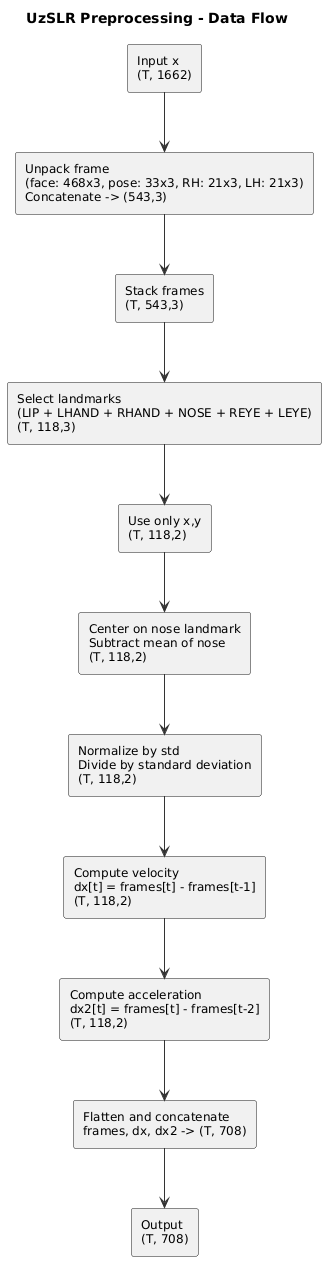

In [48]:
Image(filename='../../docs/images/preprocess_v1_data_flow.png', width=300) # T is number of frames

<details>
<summary><i>To see, preprocessing PlantUML code, click here.</i></summary>

## PlantUML code:
```code
@startuml
title UzSLR Preprocessing - Data Flow

skinparam defaultFontSize 12
skinparam ArrowColor #333
skinparam BoxBorderColor black
skinparam BoxBackgroundColor #EFEFEF

' Input
rectangle "Input x\n(T, 1662)" as Input {
  ' Each frame flattened: 468 face + 33 pose + 21 RH + 21 LH
}

' Unpack each frame
rectangle "Unpack frame\n(face: 468x3, pose: 33x3, RH: 21x3, LH: 21x3)\nConcatenate -> (543,3)" as Unpack {
  ' Drop pose visibility channel
}

' Stack frames
rectangle "Stack frames\n(T, 543,3)" as Stack {
  ' All frames stacked along first dimension
}

' Select relevant landmarks
rectangle "Select landmarks\n(LIP + LHAND + RHAND + NOSE + REYE + LEYE)\n(T, 118,3)" as Landmark {
  ' Gather important points
}

' Use only x,y
rectangle "Use only x,y\n(T, 118,2)" as XY {
  ' Drop z-coordinate
}

' Center on nose
rectangle "Center on nose landmark\nSubtract mean of nose\n(T, 118,2)" as Center {
  ' Nose reference: landmark 17
}

' Normalize
rectangle "Normalize by std\nDivide by standard deviation\n(T, 118,2)" as Normalize {
  ' Avoid division by zero
}

' Compute velocity
rectangle "Compute velocity\ndx[t] = frames[t] - frames[t-1]\n(T, 118,2)" as Velocity {
  ' First frame = 0
}

' Compute acceleration
rectangle "Compute acceleration\ndx2[t] = frames[t] - frames[t-2]\n(T, 118,2)" as Acceleration {
  ' First two frames = 0
}

' Flatten and concatenate
rectangle "Flatten and concatenate\nframes, dx, dx2 -> (T, 708)" as Flatten {
  ' 118 points * 2 coords * 3 (position, velocity, acceleration)
}

' Output
rectangle "Output\n(T, 708)" as Output

' Draw the flow (one arrow per line)
Input --> Unpack
Unpack --> Stack
Stack --> Landmark
Landmark --> XY
XY --> Center
Center --> Normalize
Normalize --> Velocity
Velocity --> Acceleration
Acceleration --> Flatten
Flatten --> Output

@enduml

```

</details>

| Step               | Input Shape    | Output Shape | Notes                               |
| ------------------ | -------------- | ------------ | ----------------------------------- |
| Original frame     | (1662,)        | (543, 3)     | unpack 3D coordinates               |
| Select landmarks   | (543, 3)       | (118, 3)     | Use lips, hands, eyes, nose         |
| Drop Z             | (118, 3)       | (118, 2)     | Only x, y                           |
| Center and normalize | (T, 118, 2)    | (T, 118, 2)  | Relative to nose, std normalization |
| Velocity           | (T, 118, 2)    | (T, 118, 2)  | $d^1x$ between frames                   |
| Acceleration       | (T, 118, 2)    | (T, 118, 2)  | $d^2x$ between frames                  |
| Flatten and concat   | (T, 118, 2) ×3 | (T, 708)     | 6 channels per node(row)               |

T is number of frames

## 3.3 augment